In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

In [53]:
dataset = pd.read_csv("airline-passengers.csv")

In [54]:
X = np.array(dataset.Passengers)

In [55]:
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X.reshape(144,1))

In [56]:
X_train,X_test = X[:100],X[100:]

In [57]:
x_data = []
y_data = []
loopback = 5
for i in range(loopback,len(X_train)):
    x_data.append(X_train[i-loopback:i])
    y_data.append(X_train[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [58]:
x_data = x_data.reshape(x_data.shape[0],x_data.shape[1],1)

In [69]:
x_data.shape

(95, 5, 1)

In [64]:
x_test_data = []
y_test_data = []
loopback = 5
for i in range(loopback,len(X_test)):
    x_test_data.append(X_test[i-loopback:i])
    y_test_data.append(X_test[i])
x_test_data = np.array(x_test_data)
y_test_data = np.array(y_test_data)

In [67]:
y_test_data.shape

(39, 1)

In [147]:
model = Sequential()

In [148]:
model.add(LSTM(units = 100,return_sequences = True, input_shape = (x_data.shape[1],1)))
model.add(Dropout(0.2))

In [149]:
model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.2))

In [150]:
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [151]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [152]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 5, 100)            40800     
_________________________________________________________________
dropout_36 (Dropout)         (None, 5, 100)            0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 5, 100)            80400     
_________________________________________________________________
dropout_37 (Dropout)         (None, 5, 100)            0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 5, 100)            80400     
_________________________________________________________________
dropout_38 (Dropout)         (None, 5, 100)            0         
_________________________________________________________________
lstm_40 (LSTM)               (None, 100)             

In [160]:
history = model.fit(x_data,y_data,epochs=500)

Epoch 1/500
95/95 [==============================] - 0s 849us/step - loss: 0.0024
Epoch 2/500
95/95 [==============================] - 0s 881us/step - loss: 0.0026
Epoch 3/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 4/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 5/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 6/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 7/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 8/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 9/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 10/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 11/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 12/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 13/500
95/95 [=============

95/95 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 103/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 104/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 105/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 106/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 107/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 108/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 109/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 110/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 111/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 112/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 113/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 114/500
95/95 [=========

95/95 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 203/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 204/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 205/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 206/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 207/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 208/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 209/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 210/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 211/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 212/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 213/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 214/500
95/95 [=========

95/95 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 303/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 304/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 305/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 306/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 307/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 308/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 309/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 310/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 311/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 312/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 313/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 314/500
95/95 [=========

95/95 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 403/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 404/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 405/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 406/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 407/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 408/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 409/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 410/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 411/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 412/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 413/500
95/95 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 414/500
95/95 [=========

[]

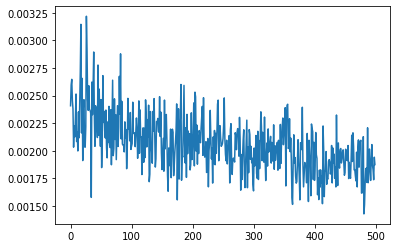

In [161]:
plt.plot(history.history['loss'])
plt.plot()

In [162]:
results = model.predict(x_test_data)

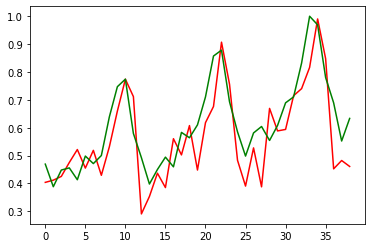

In [163]:
plt.plot(range(len(x_test_data)),results,c='r')
plt.plot(range(len(x_test_data)),y_test_data,c='g')
plt.show()

In [ ]:
plt.plot(range(len(X_train)),results,c='r')
plt.plot(range(len(X_train)),y_train,c='g')
plt.show()